<a href="https://colab.research.google.com/github/Gokulnaath07/MachineLearning/blob/main/Assignment1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Cancer_dataset.csv')

In [5]:
df.head(10)

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,843786,R,77,12.75,NaN,84.60,502.7,0.11890,0.1569,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,NaN
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1.0
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20.0


In [14]:
df['mean_texture'] = df['mean_texture'].fillna(0)
df['lymph_node_status'] = df['lymph_node_status'].fillna(0)

# Convert to NumPy
X_train = df[['mean_texture', 'lymph_node_status']].to_numpy()

# Convert to float before standardization
X_train = X_train.astype(float)
X_copy=X_train.copy()
# Verify dtype
print("X_train dtype:", X_train.dtype)  # Should be float64
X_train_destran=X_train.copy()
# Print first few rows before standardization
print("Before Standardization:\n", X_train[:5])


X_train dtype: float64
Before Standardization:
 [[27.6   5.  ]
 [10.38  2.  ]
 [17.44  0.  ]
 [20.38  0.  ]
 [14.34  0.  ]]


In [7]:
#Standardization x-mean/std
X_train[:, 0]=(X_train[:, 0]-np.mean(X_train[:, 0]))/np.std(X_train[:, 0])
X_train[:, 1]=(X_train[:, 1]-np.mean(X_train[:, 1]))/np.std(X_train[:, 1])

print(X_train[0:10])
Y_train=df[['tumor_size']]
Y_train=np.array(Y_train)
print("Before Standardization:\n", Y_train[:5])
mu_Y = np.mean(Y_train)
sigma_Y = np.std(Y_train)
Y_train=(Y_train-mu_Y)/sigma_Y
print(Y_train[0:10])

[[ 1.08825589  0.34144617]
 [-2.18114322 -0.21119423]
 [-0.84072756 -0.57962116]
 [-0.28253747 -0.57962116]
 [-1.42929534 -0.57962116]
 [-4.15189599 -0.57962116]
 [-0.42873011 -0.57962116]
 [-0.19710021  1.2625135 ]
 [-0.00913824 -0.39540769]
 [ 0.41235224  3.10464817]]
Before Standardization:
 [[5. ]
 [3. ]
 [2.5]
 [2. ]
 [3.5]]
[[ 1.11353031]
 [ 0.07890337]
 [-0.17975337]
 [-0.4384101 ]
 [ 0.3375601 ]
 [-0.17975337]
 [-0.69706684]
 [ 0.59621684]
 [-0.4384101 ]
 [ 1.63084379]]


In [8]:
print(X_train.shape)
print(Y_train.shape)

(198, 2)
(198, 1)


In [9]:
#finding cost function 1/2m(predicty-y)^2

def cost_function(X_train, Y_train, w, b):
    cost_funct=0
    m=X_train.shape[0]
    for i in range(m):
        f_wb_i=np.dot(X_train[i], w)+b
        cost_funct=cost_funct+(f_wb_i-Y_train[i])**2
    cost_function=(1/(2*m))*(cost_funct)
    return cost_function


In [10]:

def gradient_descent_db_dj(X_train, Y_train, w, b):
    m, n = X_train.shape
    dw = np.zeros(n, dtype=np.float64)
    '''Ensure dtype is float64 to avoid issues because the numpy newer version
    throws DeprecationWarning: due to multiplying two arrays'''
    db = 0.0

    for i in range(m):
        err = (np.dot(X_train[i], w) + b - Y_train[i]).item()
        for j in range(n):
            dw[j] += err * X_train[i, j]
        db += err

    dw /= m
    db /= m
    return dw, db

In [11]:

def gradient_function(X_train, Y_train, w, b, iterators, learning_rate):
    prev_loss = float('inf')
    tolerance = 1e-6
    for i in range(iterators):
        dw, db = gradient_descent_db_dj(X_train, Y_train, w, b)

        w -= learning_rate * dw
        b -= learning_rate * db
        loss = cost_function(X_train, Y_train, w, b)

        if abs(prev_loss - loss) < tolerance:  # Fixed the function call
            break
        prev_loss = loss
    return w, b


In [42]:
# Initialize parameters
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.
iterators = 100000
learning_rate = 0.0001

w, b = gradient_function(X_train, Y_train, initial_w, initial_b, iterators, learning_rate)

# Final prediction
final_val = np.dot(X_train[2], w) + b
print(f"Before De-standardized: {final_val}")
final_value=(final_val*sigma_Y)+mu_Y
print("After De-standardized: ",final_value)
print(X_train_destran[0:10])
x_given=[[17.44, 0.]]
print(x_given)
mean_X_train = np.mean(X_train_destran, axis=0)  # Mean for each column (feature)
std_X_train = np.std(X_train_destran, axis=0)    # Std for each column (feature)
std_X_given = (x_given - mean_X_train) / std_X_train

print("Original x_given:", x_given)
print("Standardized x_given:", std_X_given)

Before De-standardized: -0.19163419708888696
After De-standardized:  2.4770335987863237
[[27.6   5.  ]
 [10.38  2.  ]
 [17.44  0.  ]
 [20.38  0.  ]
 [14.34  0.  ]
 [ 0.    0.  ]
 [19.61  0.  ]
 [20.83 10.  ]
 [21.82  1.  ]
 [24.04 20.  ]]
[[17.44, 0.0]]
Original x_given: [[17.44, 0.0]]
Standardized x_given: [[-0.84072756 -0.57962116]]


In [41]:
# Make a prediction
final_val = np.dot(std_X_given, w) + b

# De-standardize the prediction
original_final_val = (final_val * sigma_Y) + mu_Y

print("De-standardized Final Prediction:", original_final_val[0])


De-standardized Final Prediction: 2.764921449601839


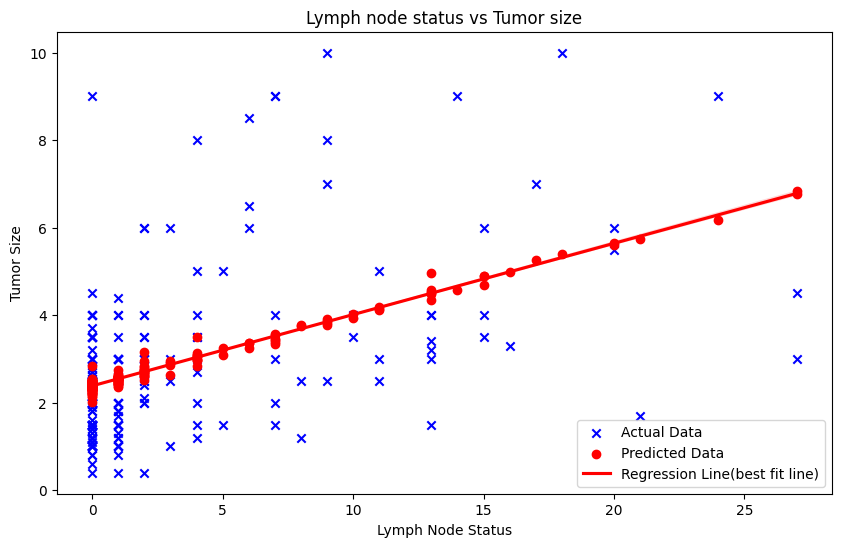

In [32]:

# Get predictions using the trained model
predicted_Y_trains = np.dot(X_train, w) + b

# De-standardize the predictions
predicted_Y_train = (predicted_Y_trains * sigma_Y) + mu_Y

# Scatter plot for actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_train_destran[:, 1], Y_train * sigma_Y + mu_Y, marker='x', label="Actual Data", color='blue')

# Scatter plot for predicted values
plt.scatter(X_train_destran[:, 1], predicted_Y_train, label="Predicted Data", color='red')

# Regression line
sns.regplot(x=X_train_destran[:, 1], y=predicted_Y_train, scatter=False, color='red', label="Regression Line(best fit line)")

plt.xlabel("Lymph Node Status")
plt.ylabel("Tumor Size")
plt.title("Lymph node status vs Tumor size")
plt.legend()
plt.show()


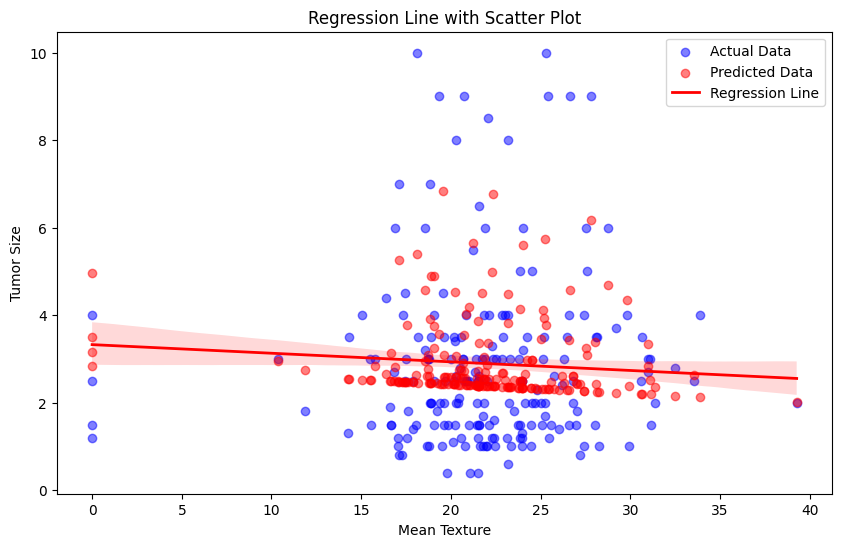

In [33]:
# Scatter plot for actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_train_destran[:, 0], Y_train * sigma_Y + mu_Y, label="Actual Data", color='blue', alpha=0.5)

# Scatter plot for predicted values
plt.scatter(X_train_destran[:, 0], predicted_Y_train, label="Predicted Data", color='red', alpha=0.5)

# Regression line
sns.regplot(x=X_train_destran[:, 0], y=predicted_Y_train, scatter=False, color='red', line_kws={"linewidth":2}, label="Regression Line")

plt.xlabel("Mean Texture")
plt.ylabel("Tumor Size")
plt.title("Regression Line with Scatter Plot")
plt.legend()
plt.show()

In [53]:
m=X_train.shape[0]
mse = np.mean((predicted_Y_trains-Y_train) ** 2)
print(mse)

1.21326469791925


In [67]:
print(Y_train[:5])
# De-standardize the actual values
print("After Standardizing Y_train")
Y_train_destran = Y_train * sigma_Y + mu_Y
print(f"Before flattening Y_train: \n{Y_train_destran[0:5]}")
# Convert to 1D array because this was in the 2D format i converted this to 1d format for it to be subracted with predicted_Y_train
Y_train_destran = Y_train_destran.flatten()
print(f"After flattening Y_train: \n{Y_train_destran[0:5]}")
# Calculate RSS and TSS with de-standardized values
y_mean = np.mean(Y_train_destran)
print(f"Mean value: {y_mean}")
print(predicted_Y_train[0:5])
ress = np.sum((Y_train_destran - predicted_Y_train) ** 2)
tss = np.sum((Y_train_destran - y_mean) ** 2)
print(f"Residual sum of squares: {ress}")
print(f"Total sum of squares: {tss}")

# Calculate R-squared
r2_manual = 1-(ress / tss)
print(f"R-Squared (Manual): {r2_manual}")

[[ 1.11353031]
 [ 0.07890337]
 [-0.17975337]
 [-0.4384101 ]
 [ 0.3375601 ]]
After Standardizing Y_train
Before flattening Y_train: 
[[5. ]
 [3. ]
 [2.5]
 [2. ]
 [3.5]]
After flattening Y_train: 
[5.  3.  2.5 2.  3.5]
Mean value: 2.847474747474747
[3.07988835 2.95087649 2.4770336  2.41553226 2.54188195]
Residual sum of squares: 569.8686662325721
Total sum of squares: 739.8737373737373
R-Squared (Manual): 0.229775788156256


In [69]:
n=X_train.shape[0]
print(f"No of data points: {n}")
p=X_train.shape[1]
print(f"No of predictors or features: {p}")
#1-((1-r^2)(n-1)/(n-p-1))
numeRator=(1-r2_manual)*(n-1)
denomiNator=(n-p-1)
r2_adj=1-(numeRator/denomiNator)
print(f"R-Squared (Adjusted): {r2_adj}")

No of data points: 198
No of predictors or features: 2
R-Squared (Adjusted): 0.2218760526501662
